# This program detects if an email is spam (1) or not (0)

# Importing Required Libraries

In [0]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string

*   Pandas are used for working with the data
*   NLTK is used to process messages
*   WordCloud and Matplotlib used for visualization

# Lodaing Data

In [99]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


We do not need columns 'Unnamed:2', 'Unnamed:3', 'Unnamed:4'

In [100]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1, inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Let's rename column 'v1' as 'labels' and 'v2' as 'messages'

In [101]:
df.rename(columns = {'v1': 'labels', 'v2': 'text'}, inplace = True)
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Let's assume Ham to be 0 and Spam to be 1
Create a column called label denoting the values

In [103]:
df['spam'] = df['labels'].map({'ham': 0,'spam': 1})
df.head()

,labels,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Drop Label column

In [104]:
df.drop(['labels'], axis = 1, inplace = True)
df.head()

,text,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [127]:
#The no of rows and columns in the dataset
df.shape

(5169, 2)

In [128]:
#Check whether dataset contains missing values
df.isnull().sum()

text    0
spam    0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5572 non-null   object
 1   spam    5572 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [108]:
df.columns

Index(['text', 'spam'], dtype='object')

In [0]:
#Checking for duplicates and removing them
df.drop_duplicates(inplace = True)

In [110]:
#Need to download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Function to omitting stopwords and punctuations from text

In [0]:
#Tokenization (a list of tokens), will be used as the analyzer
#1.Punctuations are [!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]
#2.Stop words in natural language processing, are useless words (data).
def process_text(text):
    
    #1 Remove Punctuationa
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 Remove Stop Words
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 Return a list of clean words
    return clean_words

In [138]:
# Before removing stopwords and punctuations
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [139]:
# After removing stopwords and punctuations
df['text'].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [140]:
# Count Vectorizer converts a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

messages_bow = CountVectorizer(analyzer=process_text)
messages_bow.fit_transform(df['text'])

<5169x11304 sparse matrix of type '<class 'numpy.int64'>'
	with 45872 stored elements in Compressed Sparse Row format>

# Training the Model

Splitting the data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['spam'], test_size = 0.20, random_state = 0)

Create and train the Multinomial Naive Bayes classifier which is suitable for classification with discrete features 

In [117]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [144]:
pred = classifier.predict(X_train)
#Print the predictions
print(pred)

[0 0 0 ... 0 0 0]


In [121]:
#Print the actual values
print(y_train.values)

[0 0 0 ... 0 0 0]


In [151]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print('*******************************************************')
print(classification_report(y_train ,pred, labels=[1, 2] ))
print('*******************************************************')
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print('*******************************************************')
print('Accuracy: ', accuracy_score(y_train,pred))
print('*******************************************************')

*******************************************************
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       504
           2       0.00      0.00      0.00         0

   micro avg       0.98      0.98      0.98       504
   macro avg       0.49      0.49      0.49       504
weighted avg       0.98      0.98      0.98       504

*******************************************************
Confusion Matrix: 
 [[3623    8]
 [  11  493]]
*******************************************************
Accuracy:  0.9954050785973397
*******************************************************


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing the classifier on Test Dataset

In [152]:
pred = classifier.predict(X_test)
#Print the predictions
print('Predicted value: ', pred)

Predicted value:  [0 0 0 ... 0 0 0]


In [153]:
#Print Actual Label
print('Actual value: ',y_test.values)

Actual value:  [0 0 0 ... 0 0 0]


In [157]:
#Evaluate the model on the test data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print('*******************************************************')
print(classification_report(y_test ,pred ))
print('*******************************************************')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred, labels=[1, 2]))
print('*******************************************************')
print('Accuracy: ', accuracy_score(y_test,pred))
print('*******************************************************')

*******************************************************
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       885
           1       0.80      0.93      0.86       149

    accuracy                           0.96      1034
   macro avg       0.89      0.94      0.92      1034
weighted avg       0.96      0.96      0.96      1034

*******************************************************
Confusion Matrix: 
 [[138   0]
 [  0   0]]
*******************************************************
Accuracy:  0.9555125725338491
*******************************************************


# Visualization

Let's see the most repeated words in the spam messages

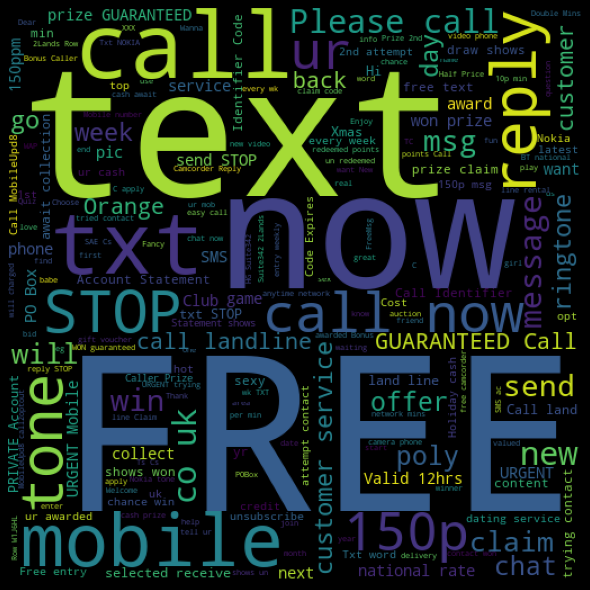

In [142]:
spam_words = ' '.join(list(df[df['spam'] == 1]['text']))
spam_wordcloud = WordCloud(width = 512, height = 512).generate(spam_words)

plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Let's see the most repeated words in the non-spam messages

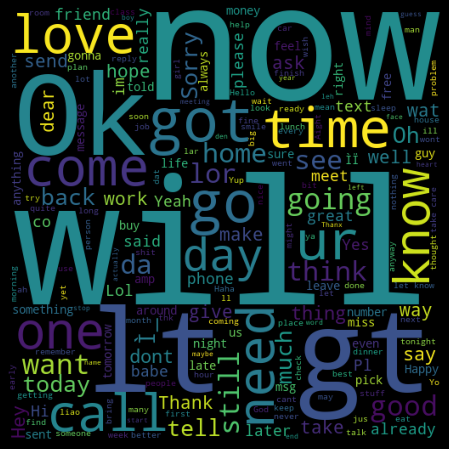

In [143]:
ham_words = ' '.join(list(df[df['spam'] == 0]['text']))
ham_wordcloud = WordCloud(width = 512, height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.show() 

We achieved a 95.55% accuracy, to determine whether an email is spam or non-spam, using Multinomial Naive Bayes classifier